<a href="https://colab.research.google.com/github/PrasannaMummigatti/Optimization_Examples/blob/main/LP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

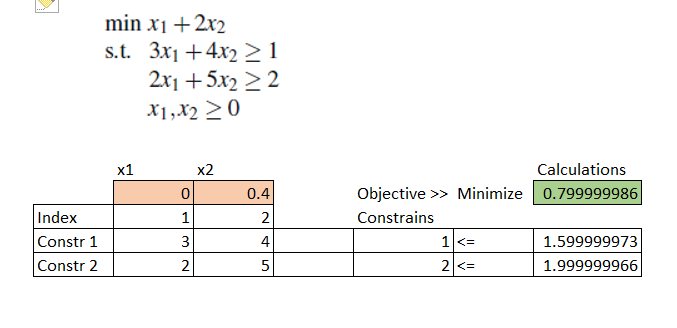

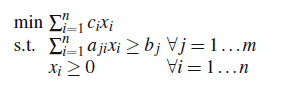

In [1]:
##@title Import necessary modules and packages
%%capture
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

In [19]:
N = [1,2]
M = [1,2]
c = {1:1, 2:2}
a = {(1,1):3, (1,2):4, (2,1):2, (2,2):5}
b = {1:1, 2:2}

In [23]:
model=ConcreteModel()

model.x=Var(N,within=NonNegativeReals)

def obj_rule(model):
  return sum(c[i]*model.x[i] for i in N)
model.obj=Objective(rule=obj_rule,sense=minimize)

def con_rule(model, m):
  return sum(a[m,i]*model.x[i] for i in N)   >= b[m]
model.con = Constraint(M, rule=con_rule)

results = SolverFactory('cbc').solve(model)
#results.write()

In [21]:
[model.x[i]() for i in N]

[0.0, 0.4]

In [22]:
model.obj()

0.8